In [81]:
import time 
import random
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
train_df = pd.read_csv('data/train.csv')
train_df.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [5]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#age

In [7]:
train_df['Age'].isnull().sum() / train_df.shape[0]*100

19.865319865319865

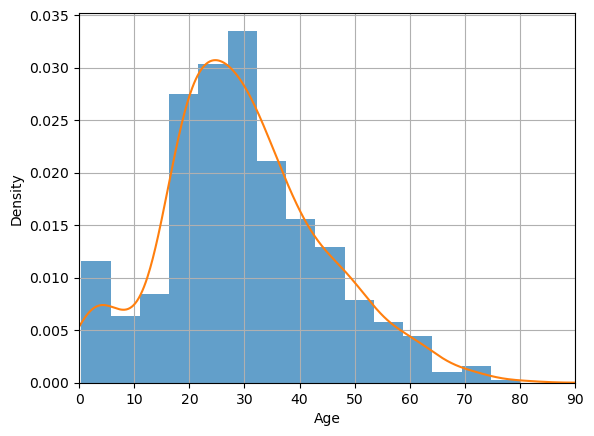

In [13]:
ax = train_df['Age'].hist(bins=15,density=True,stacked=True,alpha=0.7)

train_df['Age'].plot(kind='density')

ax.set(xlabel='Age')
plt.xlim(0,90)
plt.grid();

In [15]:
train_df['Age'].median(skipna=True)

28.0

#cabin

In [17]:
train_df['Cabin'].isnull().sum() / train_df.shape[0]*100

77.10437710437711

#embarked

In [19]:
train_df['Embarked'].isnull().sum() / train_df.shape[0]*100

0.22446689113355783

In [20]:
print(train_df['Embarked'].value_counts() / train_df.shape[0] * 100)

S    72.278339
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64


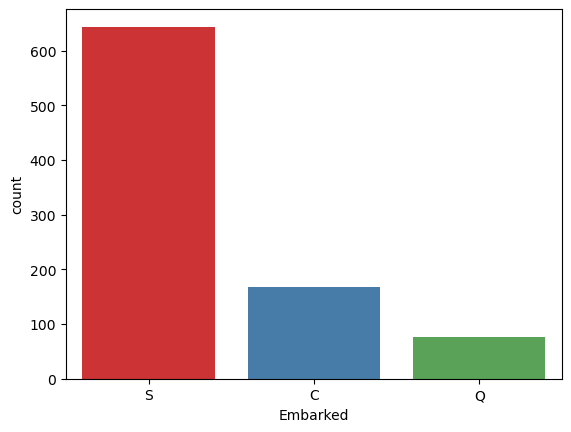

In [21]:
sns.countplot(x='Embarked',data=train_df,palette='Set1');

#

In [22]:
train_data = train_df.copy()

In [23]:
train_data['Age'].fillna(train_df['Age'].median(skipna=True),inplace=True)

In [24]:
train_data['Embarked'].fillna(train_df['Embarked'].value_counts().idxmax(),inplace=True)

In [25]:
train_data.drop('Cabin',axis=1,inplace=True)

In [26]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [28]:
train_data['Solo'] = np.where((train_data['SibSp']+train_data['Parch'])>0,0,1)

In [29]:
train_data.drop('SibSp',axis=1,inplace=True)
train_data.drop('Parch',axis=1,inplace=True)

In [30]:
train_data.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Solo
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,1
5,6,0,3,"Moran, Mr. James",male,28.0,330877,8.4583,Q,1


In [31]:
train_data = pd.get_dummies(train_data,columns=['Pclass','Embarked','Sex'],drop_first=True)

In [33]:
train_data.head(6)

,PassengerId,Survived,Name,Age,Ticket,Fare,Solo,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,1,0,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,0,0,1,0,1,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,0,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,1,0,1,0,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,53.1000,0,0,0,0,1,0
4,5,0,"Allen, Mr. William Henry",35.0,373450,8.0500,1,0,1,0,1,1
5,6,0,"Moran, Mr. James",28.0,330877,8.4583,1,0,1,1,0,1


In [35]:
train_data.drop('PassengerId',axis=1,inplace=True)
train_data.drop('Name',axis=1,inplace=True)
train_data.drop('Ticket',axis=1,inplace=True)

In [36]:
train_data.head(6)

,Survived,Age,Fare,Solo,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,1,0,1,1
1,1,38.0,71.2833,0,0,0,0,0,0
2,1,26.0,7.9250,1,0,1,0,1,0
3,1,35.0,53.1000,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,1,0,1,1
5,0,28.0,8.4583,1,0,1,1,0,1


#EDA

In [37]:
train_data.shape

(891, 9)

In [38]:
col_names = train_data.columns
col_names

Index(['Survived', 'Age', 'Fare', 'Solo', 'Pclass_2', 'Pclass_3', 'Embarked_Q',
       'Embarked_S', 'Sex_male'],
      dtype='object')

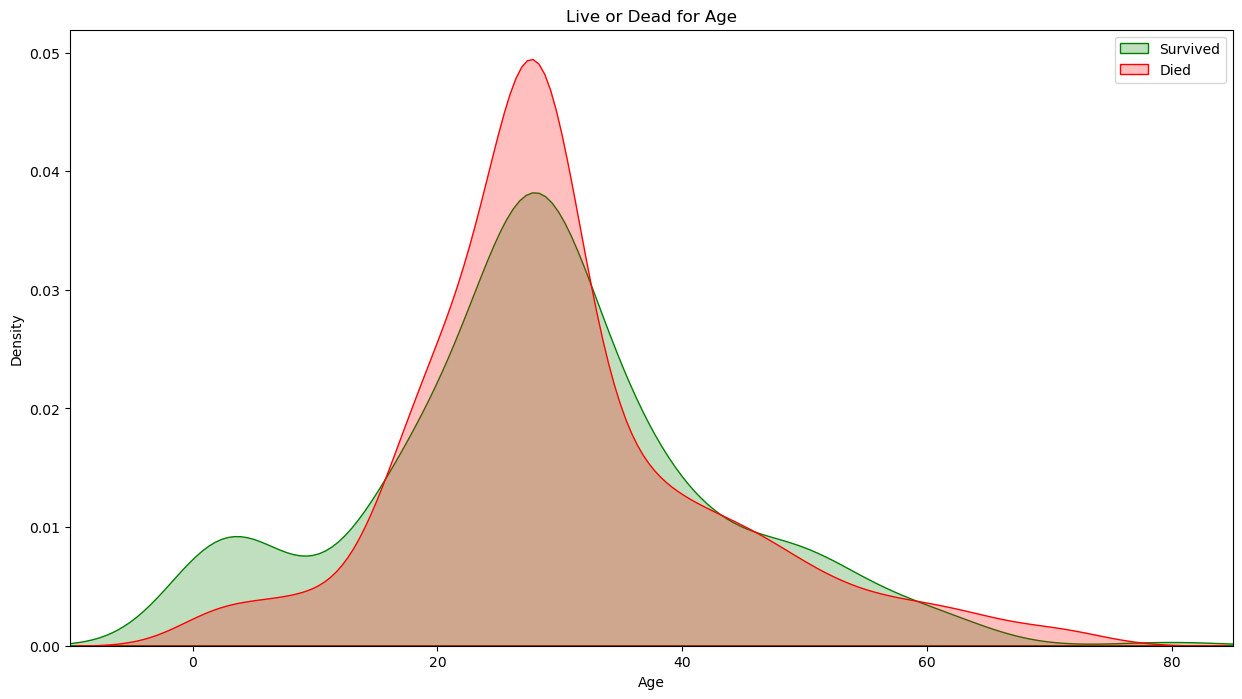

In [44]:
plt.figure(figsize=(15,8))

ax = sns.kdeplot(train_data['Age'][train_data.Survived==1],color='green',shade=True)
sns.kdeplot(train_data['Age'][train_data.Survived==0],color='red',shade=True)

plt.legend(['Survived','Died'])
plt.title('Live or Dead for Age')
ax.set(xlabel='Age')
plt.xlim(-10,85);

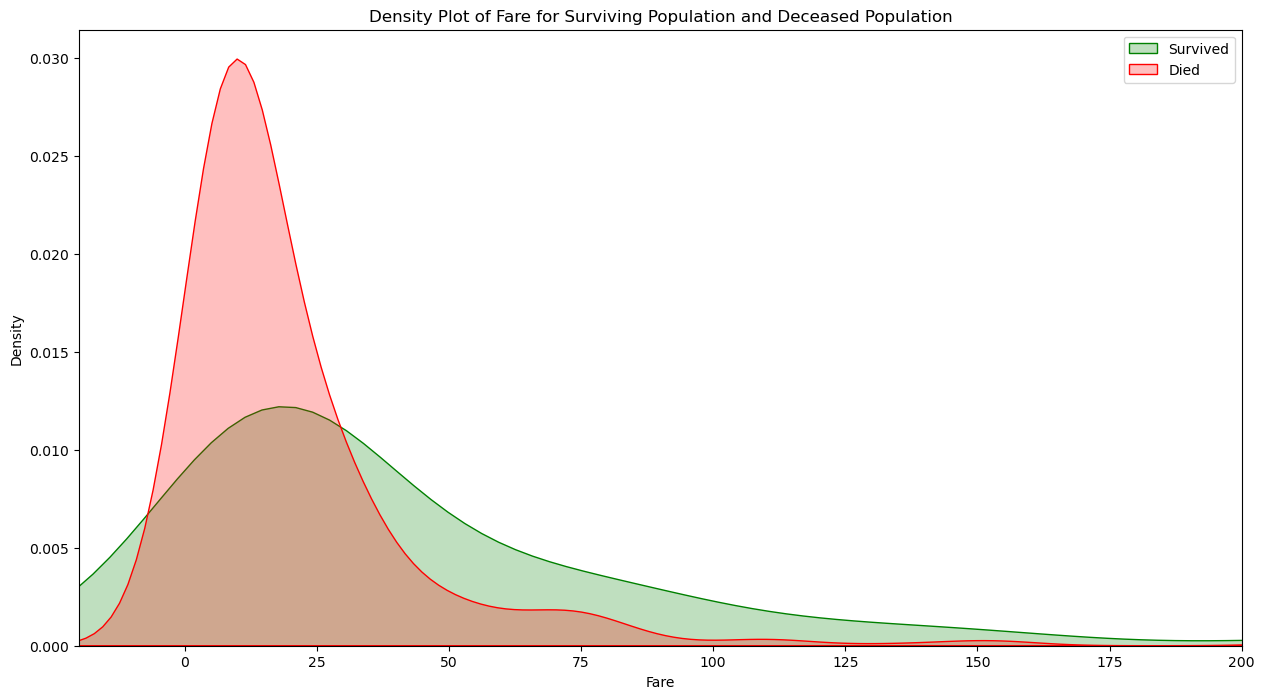

In [49]:
plt.figure(figsize=(15,8))

ax = sns.kdeplot(train_data["Fare"][train_data.Survived == 1], color='green', shade=True)
sns.kdeplot(train_data["Fare"][train_data.Survived == 0], color='red', shade=True)

plt.legend(['Survived','Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-20,200);

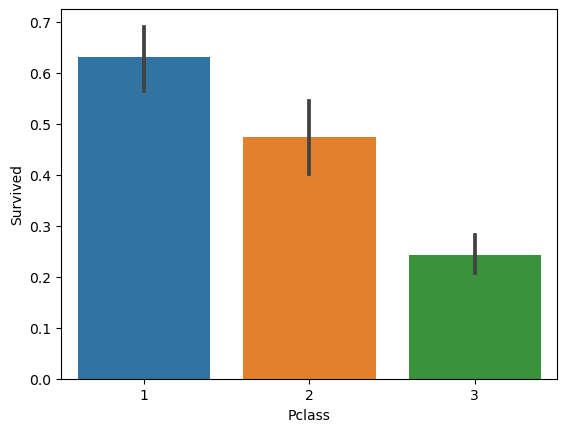

In [51]:
sns.barplot('Pclass','Survived',data=train_df);

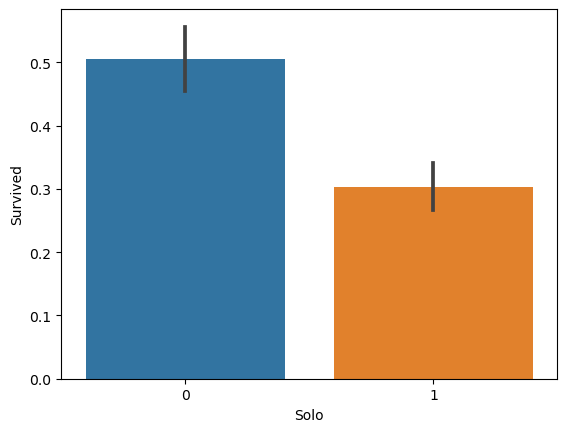

In [53]:
sns.barplot('Solo','Survived',data=train_data);

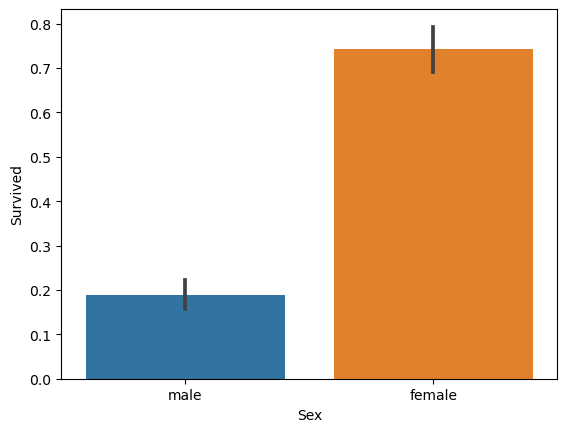

In [54]:
sns.barplot('Sex','Survived',data=train_df);

In [55]:
y = train_data['Survived']
train_data.drop('Survived',axis=1,inplace=True)

In [57]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,891.0,29.361582,13.019697,0.42,22.0000,28.0000,35.0,80.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292
Solo,891.0,0.602694,0.489615,0.00,0.0000,1.0000,1.0,1.0000
Pclass_2,891.0,0.206510,0.405028,0.00,0.0000,0.0000,0.0,1.0000
Pclass_3,891.0,0.551066,0.497665,0.00,0.0000,1.0000,1.0,1.0000
Embarked_Q,891.0,0.086420,0.281141,0.00,0.0000,0.0000,0.0,1.0000
Embarked_S,891.0,0.725028,0.446751,0.00,0.0000,1.0000,1.0,1.0000
Sex_male,891.0,0.647587,0.477990,0.00,0.0000,1.0000,1.0,1.0000


In [58]:
cols = train_data.columns
cols

Index(['Age', 'Fare', 'Solo', 'Pclass_2', 'Pclass_3', 'Embarked_Q',
       'Embarked_S', 'Sex_male'],
      dtype='object')

In [59]:
scaler = MinMaxScaler()

In [60]:
train_data  = scaler.fit_transform(train_data)

In [61]:
train_data = pd.DataFrame(train_data,columns=[cols])

In [62]:
train_data.head(6)

,Age,Fare,Solo,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,0.271174,0.014151,0.0,0.0,1.0,0.0,1.0,1.0
1,0.472229,0.139136,0.0,0.0,0.0,0.0,0.0,0.0
2,0.321438,0.015469,1.0,0.0,1.0,0.0,1.0,0.0
3,0.434531,0.103644,0.0,0.0,0.0,0.0,1.0,0.0
4,0.434531,0.015713,1.0,0.0,1.0,0.0,1.0,1.0
5,0.346569,0.016510,1.0,0.0,1.0,1.0,0.0,1.0


#traintestsplit

In [63]:
X_train, X_test, y_train, y_test = train_test_split(train_data,y,test_size=0.2,random_state=2)

In [64]:
X_train.shape

(712, 8)

In [65]:
X_test.shape

(179, 8)

In [66]:
fit_rf = RandomForestClassifier(random_state=42)

#hyperparameter

In [80]:
import warnings
warnings.filterwarnings("ignore")

np.random.seed(42)

start = time.time()

param_dist = {'max_depth':[2,3,4],
              'n_estimators':[100,200,400],
              'max_features':['auto','sqrt','log2',None],
              'criterion':['gini','entropy']
             }

cv_rf = GridSearchCV(fit_rf, cv=5, param_grid = param_dist, n_jobs=4)
cv_rf.fit(X_train,y_train)

print(f'Best Parameters by GridSearch: {cv_rf.best_params_}')

end = time.time()

print('Time spent on GridSearch is: {0:.2f}'.format(end-start))

/Users/m_canfirat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/m_canfirat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/m_canfirat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/m_canfirat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.

Best Parameters by GridSearch: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 200}
Time spent on GridSearch is: 26.97


/Users/m_canfirat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [83]:
fit_rf.set_params (criterion = 'entropy',
                   max_features = 'log2',
                   max_depth = 4,
                   n_estimators = 200)

RandomForestClassifier(criterion='entropy', max_depth=4, max_features='log2',
                       n_estimators=200, random_state=42)

In [85]:
fit_rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=4, max_features='log2',
                       n_estimators=200, random_state=42)

In [86]:
pd.concat((pd.DataFrame(X_train.columns,columns=['feature']),
          pd.DataFrame(fit_rf.feature_importances_,columns=['importance'])),
         axis = 1).sort_values(by='importance',ascending=False)

,feature,importance
7,"(Sex_male,)",0.478053
1,"(Fare,)",0.188794
4,"(Pclass_3,)",0.137478
0,"(Age,)",0.107912
2,"(Solo,)",0.027833
3,"(Pclass_2,)",0.023185
6,"(Embarked_S,)",0.022427
5,"(Embarked_Q,)",0.014319


#prediction

In [88]:
y_pred = fit_rf.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0])

#accuracy

In [90]:
print(f"Model's Accuracy Score: {accuracy_score(y_test,y_pred)}")

Model's Accuracy Score: 0.7877094972067039


In [91]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.97      0.84       100
           1       0.94      0.56      0.70        79

    accuracy                           0.79       179
   macro avg       0.84      0.76      0.77       179
weighted avg       0.82      0.79      0.78       179

